<a href="https://colab.research.google.com/github/lKAYNONl/MLlab/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np                # математика
import pandas as pd               # работа с табличными данными

import matplotlib.pyplot as plt   # визуализация
import seaborn as sns                   # визуализация

import os

from google.colab import data_table
data_table.enable_dataframe_formatter()

# set the environment variable for the API key
os.environ['KAGGLE_USERNAME'] = "kaynomi" # your Kaggle username
os.environ['KAGGLE_KEY'] = "c92a51b40c941f720d14a21ddbf7e690" # your Kaggle key

# загрузить фрейм данных из загруженного файла

# download the dataset
!kaggle datasets download -d wenruliu/adult-income-dataset

# unzip the dataset
!unzip adult-income-dataset.zip

""" 
# вариант с загрузкой файла через всплывабщее окно
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])


# вариант загрузки по url
url = 'https://www.kaggle.com/wenruliu/adult-income-dataset?select=adult.csv'

# 2.Загрузите данные в DataFrame. Много ли данных? Сколько признаков? Какие из них не числовые? 
df = pd.read_csv(url)
"""




  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 88.9MB/s]
Archive:  adult-income-dataset.zip
  inflating: adult.csv               


" \n# вариант с загрузкой файла через всплывабщее окно\nfrom google.colab import files\nuploaded = files.upload()\n\nimport pandas as pd\ndf = pd.read_csv(list(uploaded.keys())[0])\n\n\n# вариант загрузки по url\nurl = 'https://www.kaggle.com/wenruliu/adult-income-dataset?select=adult.csv'\n\n# 2.Загрузите данные в DataFrame. Много ли данных? Сколько признаков? Какие из них не числовые? \ndf = pd.read_csv(url)\n"

In [19]:
# посмотрим на
df = pd.read_csv("adult.csv")
print(df.info())

print(df.shape[1])
non_numeric_columns = df.select_dtypes(exclude='number').columns
print(non_numeric_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
15
Index(['workclass', 'education', 'marital-status', 'occupation',
   

In [20]:
df['age'].dropna().values

array([25, 38, 28, ..., 58, 22, 52])

Изучите статистику по данным

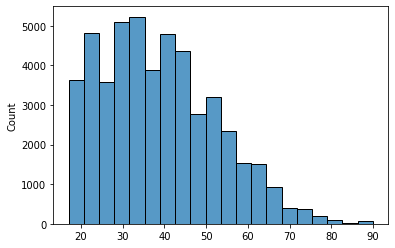

In [21]:

sns.histplot( df['age'].dropna().values, bins=20 )

In [22]:

df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

Сделайте несколько простых запросов к таблице данных. Например: показать всех белых людей с доходом больше 50 тыс.

In [23]:
df[  (df['race']=='White') & (df['income']=='>50K') ]

age         workclass  fnlwgt    education  educational-num  \
2       28         Local-gov  336951   Assoc-acdm               12   
7       63  Self-emp-not-inc  104626  Prof-school               15   
10      65           Private  184454      HS-grad                9   
14      48           Private  279724      HS-grad                9   
15      43           Private  346189      Masters               14   
...    ...               ...     ...          ...              ...   
48820   71                 ?  287372    Doctorate               16   
48826   39         Local-gov  111499   Assoc-acdm               12   
48835   53           Private  321865      Masters               14   
48838   40           Private  154374      HS-grad                9   
48841   52      Self-emp-inc  287927      HS-grad                9   

           marital-status         occupation relationship   race  gender  \
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
7      Married-civ-spouse     Prof-specialty      Husband  White    Male   
10     Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
14     Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
15     Married-civ-spouse    Exec-managerial      Husband  White    Male   
...                   ...                ...          ...    ...     ...   
48820  Married-civ-spouse                  ?      Husband  White    Male   
48826  Married-civ-spouse       Adm-clerical         Wife  White  Female   
48835  Married-civ-spouse    Exec-managerial      Husband  White    Male   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
2                 0             0              40  United-States   >50K  
7              3103             0              32  United-States   >50K  
10             6418             0              40  United-States   >50K  
14             3103             0              48  United-States   >50K  
15                0             0              50  United-States   >50K  
...             ...           ...             ...            ...    ...  
48820             0             0              10  United-States   >50K  
48826             0             0              20  United-States   >50K  
48835             0             0              40  United-States   >50K  
48838             0             0              40  United-States   >50K  
48841         15024             0              40  United-States   >50K  

[10607 rows x 15 columns]

In [8]:
df[  (df['relationship']=='Not-in-family') & (df['marital-status']=='Never-married') & (df['native-country']=='Canada')&  (df['income']=='>50K') ]

age     workclass  fnlwgt    education  educational-num marital-status  \
6138    49       Private  101320    Bachelors               13  Never-married   
12147   25       Private  223426    Assoc-voc               11  Never-married   
15024   48  Self-emp-inc  192755    Bachelors               13  Never-married   
33819   38   Federal-gov   37683  Prof-school               15  Never-married   

            occupation   relationship                race  gender  \
6138      Tech-support  Not-in-family               White  Female   
12147            Sales  Not-in-family               White    Male   
15024  Exec-managerial  Not-in-family               White  Female   
33819   Prof-specialty  Not-in-family  Asian-Pac-Islander  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
6138              0          1564              40         Canada   >50K  
12147             0             0              65         Canada   >50K  
15024             0             0              55         Canada   >50K  
33819         99999             0              57         Canada   >50K

Удалите пропуски, дубликаты, выбросы.
Сколько данных осталось?
Пришлось ли удалять столбцы.

In [24]:

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [25]:
df.duplicated().sum()

52

In [26]:
print(f"число дубликатов { df.duplicated().sum() }")

# дублирующиеся строки
df[ df.duplicated() ]

число дубликатов 52


age         workclass  fnlwgt     education  educational-num  \
864     24           Private  194630     Bachelors               13   
11189   37           Private   52870     Bachelors               13   
11212   29           Private   36440     Bachelors               13   
13848   30           Private  180317     Assoc-voc               11   
15960   18      Self-emp-inc  378036          12th                8   
18476   39           Private  184659       HS-grad                9   
19399   19           Private  130431       5th-6th                3   
19726   41           Private  116391     Bachelors               13   
20606   25           Private  308144     Bachelors               13   
21162   25           Private  308144     Bachelors               13   
21385   90           Private   52386  Some-college               10   
24361   21           Private  243368     Preschool                1   
25189   29                 ?   41281     Bachelors               13   
25452   21           Private  250051  Some-college               10   
25652   23           Private  239539       HS-grad                9   
26122   21           Private  301694       HS-grad                9   
26375   19                 ?  167428  Some-college               10   
27912   20           Private  107658  Some-college               10   
29365   25           Private  195994       1st-4th                2   
30862   31           Private  228873       HS-grad                9   
30971   19           Private  318822       HS-grad                9   
31340   21           Private  243368     Preschool                1   
33321   46           Private  173243       HS-grad                9   
34148   45           Private   82797     Bachelors               13   
34836   30           Private  144593       HS-grad                9   
34979   19           Private   97261       HS-grad                9   
35848   47           Private  199058  Some-college               10   
36767   43           Private  195258       HS-grad                9   
36848   22           Private  137876  Some-college               10   
37599   19           Private  138153  Some-college               10   
37771   19           Private  146679  Some-college               10   
38156   49           Private   31267       7th-8th                4   
38255   30           Private  111567       HS-grad                9   
38530   19           Private  139466  Some-college               10   
38581   25           Private  195994       1st-4th                2   
38648   44           Private  367749     Bachelors               13   
38775   49  Self-emp-not-inc   43479  Some-college               10   
40948   17           Private  153021          12th                8   
41965   25           Private  112835     Bachelors               13   
42153   23           Private  240137       5th-6th                3   
42594   28           Private  274679       Masters               14   
44201   23           Private  107882     Bachelors               13   
44511   27           Private  255582       HS-grad                9   
44803   42           Private  204235  Some-college               10   
45127   39           Private   30916       HS-grad                9   
45438   38           Private  207202       HS-grad                9   
46626   23           Private  250630     Bachelors               13   
46665   20                 ?  203353  Some-college               10   
46979   22                 ?  334593  Some-college               10   
47126   46           Private  133616  Some-college               10   
48274   19           Private  251579  Some-college               10   
48685   35           Private  379959       HS-grad                9   

              marital-status         occupation   relationship  \
864            Never-married     Prof-specialty  Not-in-family   
11189     Married-civ-spouse    Exec-managerial        Husband   
11212          Never-married       Adm-cleric

In [27]:
# replace the '?' character with np.nan
df = df.replace('?', np.nan)

df.isna()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0      False      False   False      False            False           False   
1      False      False   False      False            False           False   
2      False      False   False      False            False           False   
3      False      False   False      False            False           False   
4      False       True   False      False            False           False   
...      ...        ...     ...        ...              ...             ...   
48837  False      False   False      False            False           False   
48838  False      False   False      False            False           False   
48839  False      False   False      False            False           False   
48840  False      False   False      False            False           False   
48841  False      False   False      False            False           False   

       occupation  relationship   race  gender  capital-gain  capital-loss  \
0           False         False  False   False         False         False   
1           False         False  False   False         False         False   
2           False         False  False   False         False         False   
3           False         False  False   False         False         False   
4            True         False  False   False         False         False   
...           ...           ...    ...     ...           ...           ...   
48837       False         False  False   False         False         False   
48838       False         False  False   False         False         False   
48839       False         False  False   False         False         False   
48840       False         False  False   False         False         False   
48841       False         False  False   False         False         False   

       hours-per-week  native-country  income  
0               False           False   False  
1               False           False   False  
2               False           False   False  
3               False           False   False  
4               False           False   False  
...               ...             ...     ...  
48837           False           False   False  
48838           False           False   False  
48839           False           False   False  
48840           False           False   False  
48841           False           False   False  

[48842 rows x 15 columns]

In [28]:
df.isna().sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [29]:
# пропуски можно визуализировать
# построим из таблицы тепловую карту, где светлым отметим пропуски (True значения, которые вернёт data0.isna())
plt.figure( figsize=(15,10) )   # для удобства сделаем график большим
sns.heatmap( df.isna() )

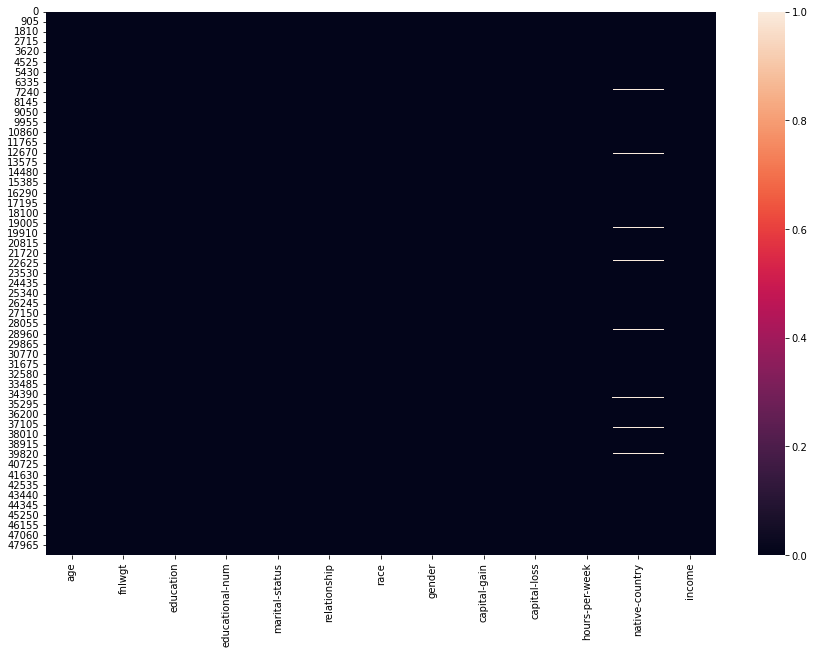

In [30]:
data = df.drop( columns=['workclass', 'occupation'] )
# пропуски можно визуализировать
# построим из таблицы тепловую карту, где светлым отметим пропуски (True значения, которые вернёт data0.isna())
plt.figure( figsize=(15,10) )   # для удобства сделаем график большим
sns.heatmap( data.isna() )

Сделайте несколько визуализаций:

Гистограммы частот

Ящики с усами и скрипки

Попарные диаграммы рассеивания

Нарисуйте разным цветом объекты с разным значением целевой переменной -- доход

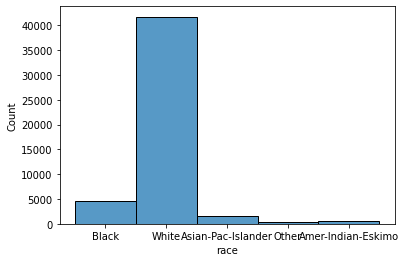

In [31]:
# простая гистограмма
sns.histplot( data['race'], discrete=True )

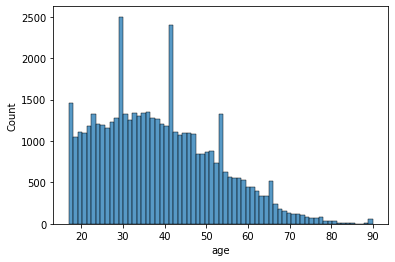

In [32]:
sns.histplot(data['age'])

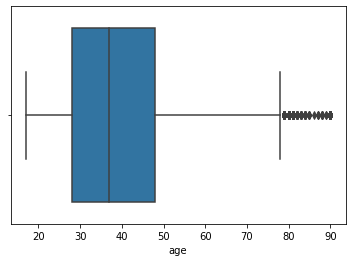

In [33]:
sns.boxplot(data=data, x ='age' )

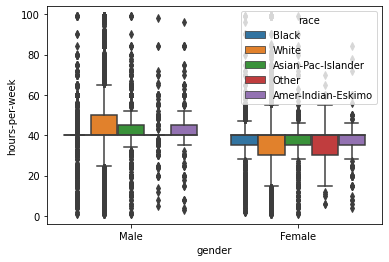

In [34]:
sns.boxplot(data=data, x ='gender', y='hours-per-week' , hue = 'race')

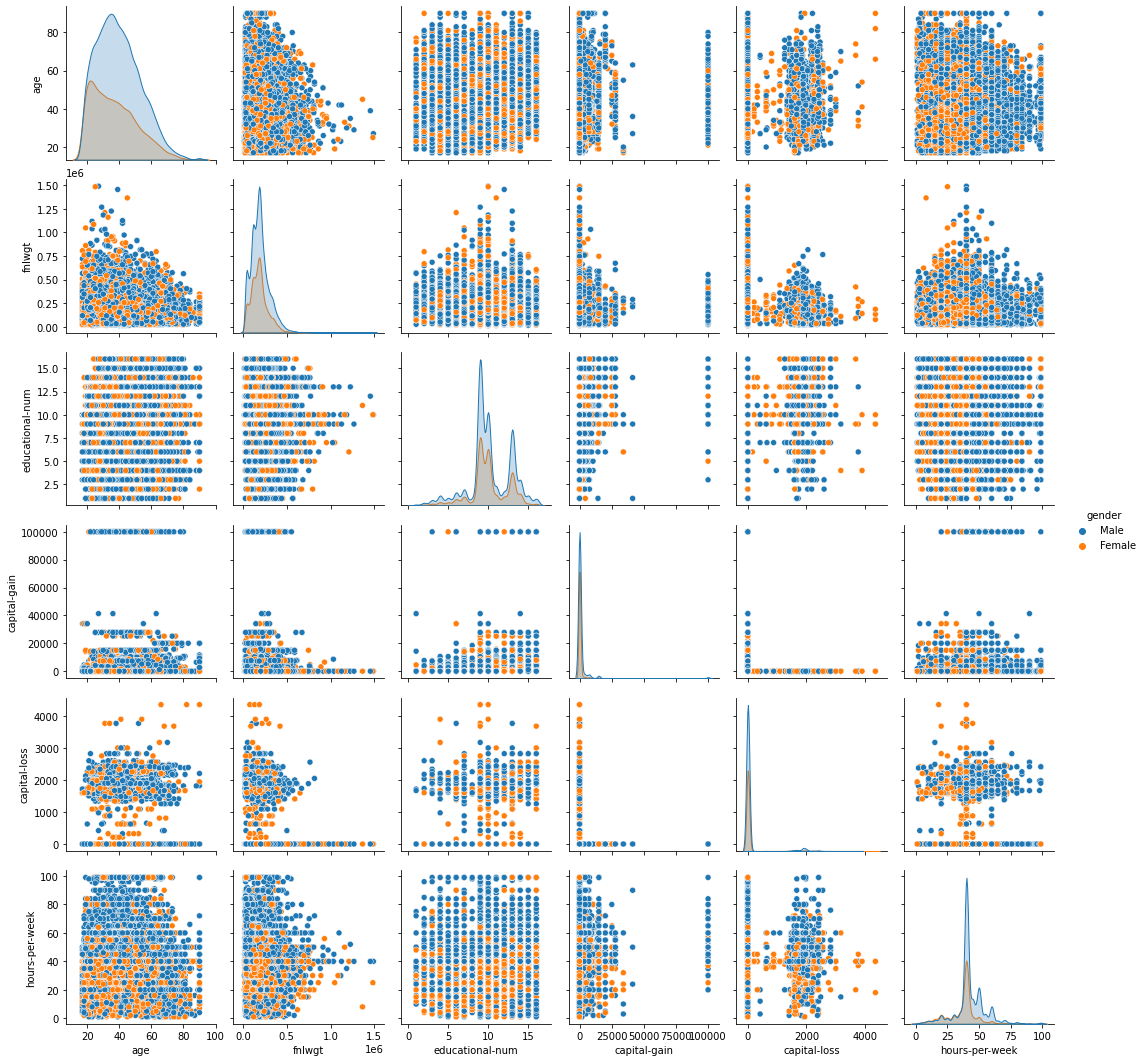

In [39]:
sns.pairplot(data, hue='gender')

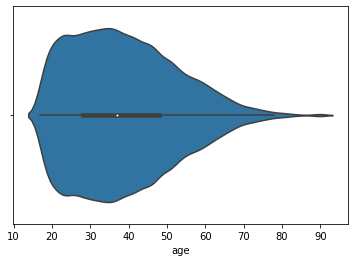

In [35]:
sns.violinplot(data=data, x='age')

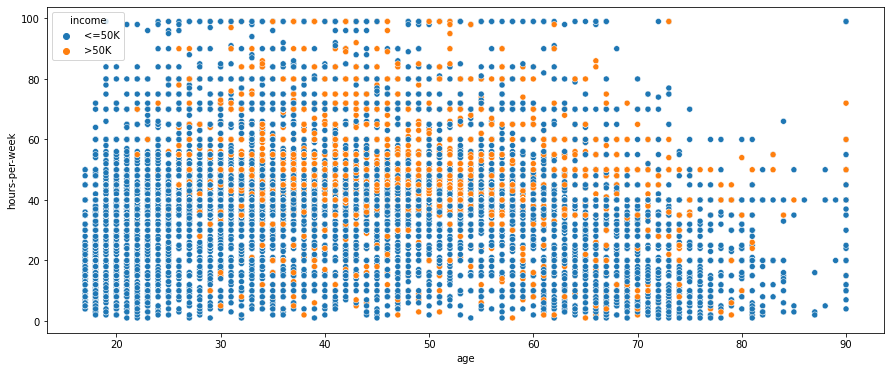

In [38]:
plt.figure( figsize=(15,6) )
sns.scatterplot( x='age', y ='hours-per-week', hue='income', data=data ) 

